In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

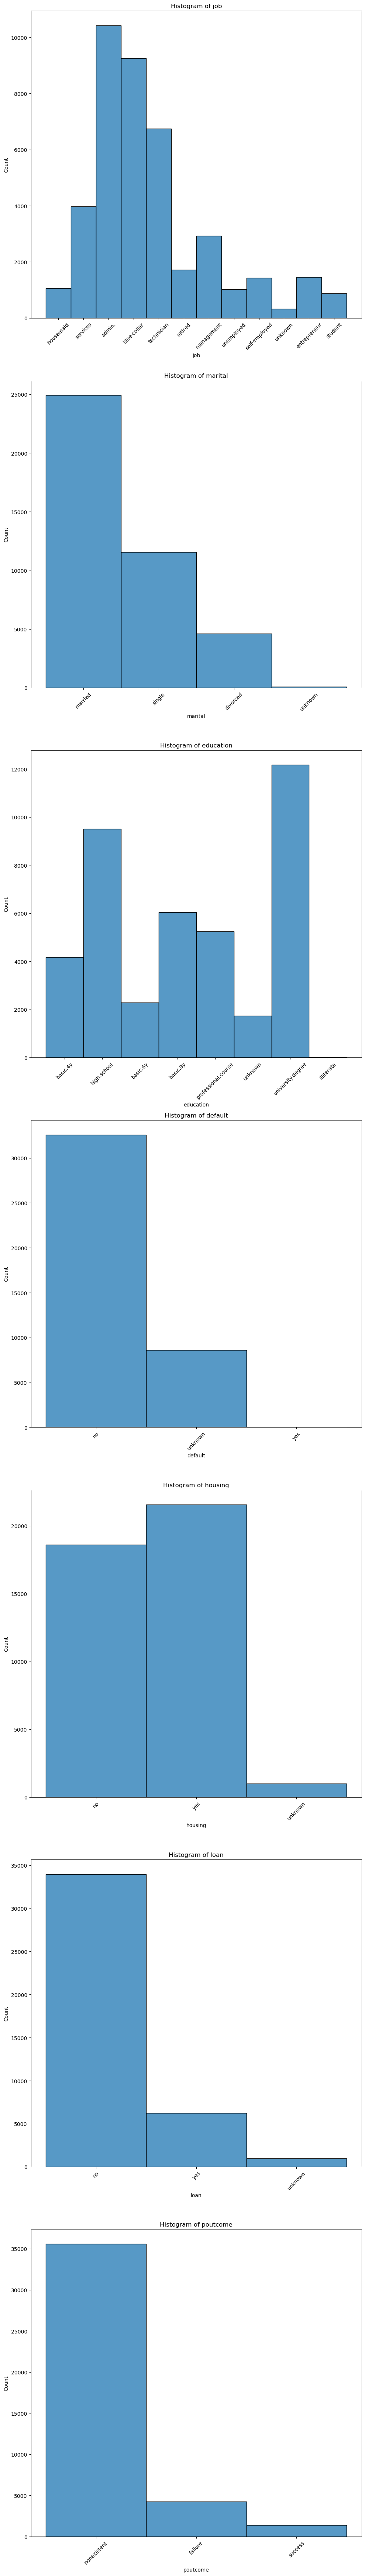

In [31]:
# Define the columns you want to plot
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 10 * len(columns_to_plot)))

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    # Rotate the x-axis labels
    axes[i].tick_params(axis='x', labelrotation=45)  # You can adjust the rotation angle as needed

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [33]:
value_counts_desc = df.stack().value_counts().sort_values(ascending=False)
value_counts_desc.head(10)

no             121708
999             39675
0               35582
nonexistent     35563
yes             32467
cellular        26144
married         24928
1               22250
1.4             16247
5228.1          16234
dtype: int64

In [34]:
condition = (df['pdays'] == 999) & (df['poutcome'] == 'failure')

df.loc[condition, 'poutcome'] = 'nonexistent'

In [35]:
df['poutcome'].value_counts()

nonexistent    39673
success         1373
failure          142
Name: poutcome, dtype: int64

In [36]:
df.replace('unknown', np.nan, inplace=True)
df.replace('nonexistent', np.nan, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
from sklearn.preprocessing import LabelEncoder

# Specify the columns you want to label encode
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [38]:
# Specify the columns you want to impute
columns_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Create a subset DataFrame with the selected columns
df_subset = df[columns_to_impute]

# Initialize the IterativeImputer with the estimator as ExtraTreesRegressor
rf_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
rf_imputer = IterativeImputer(estimator=rf_estimator, random_state=0)

# Perform the imputation
df_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=columns_to_impute)

# Replace missing values in the original DataFrame with imputed values
df[columns_to_impute] = df_imputed



### Modelo de random forest para feature_importance

Accuracy on the test set: 0.91


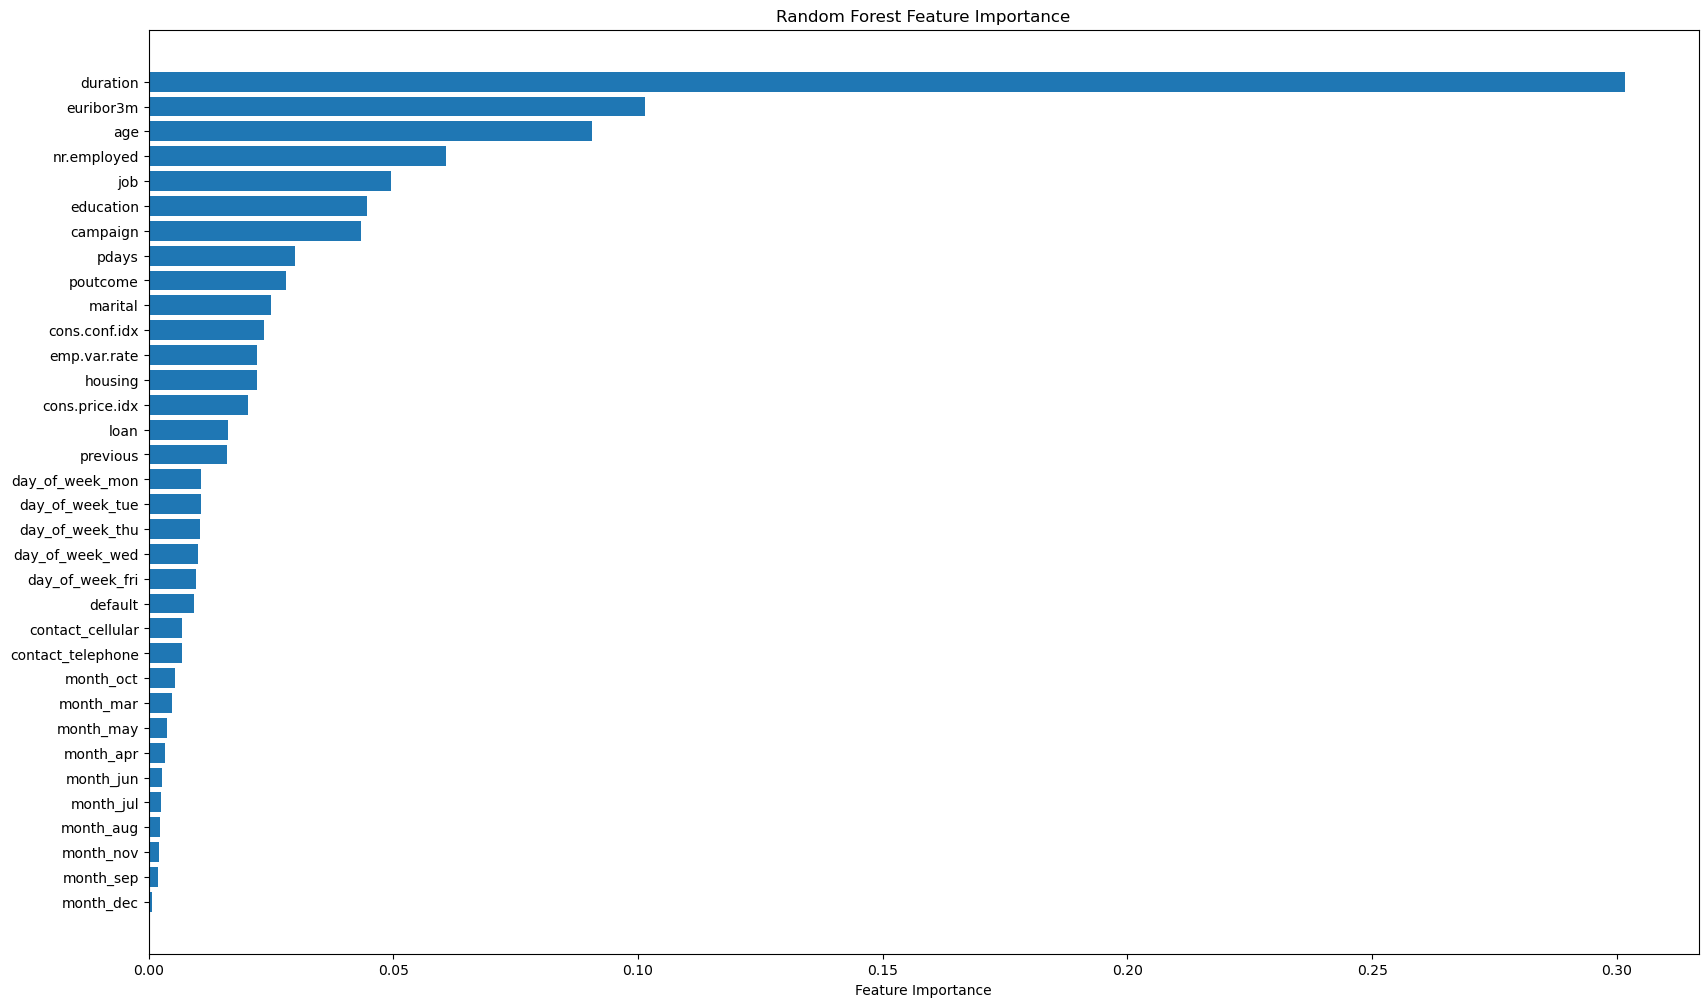

In [39]:
X = df.drop(columns=['y'])
y = df['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(20, 12))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [41]:
probabilities = rf_model.predict_proba(X_test)

prob_yes = probabilities[:, 1]
prob_no = probabilities[:, 0]

print("Probabilities for 'yes':", prob_yes[:5])
print("Probabilities for 'no':", prob_no[:5])

Probabilities for 'yes': [0.09 0.   0.01 0.01 0.  ]
Probabilities for 'no': [0.91 1.   0.99 0.99 1.  ]


### Removendo 'duration', pois a variável torna o dataset biased

Accuracy on the test set: 0.89


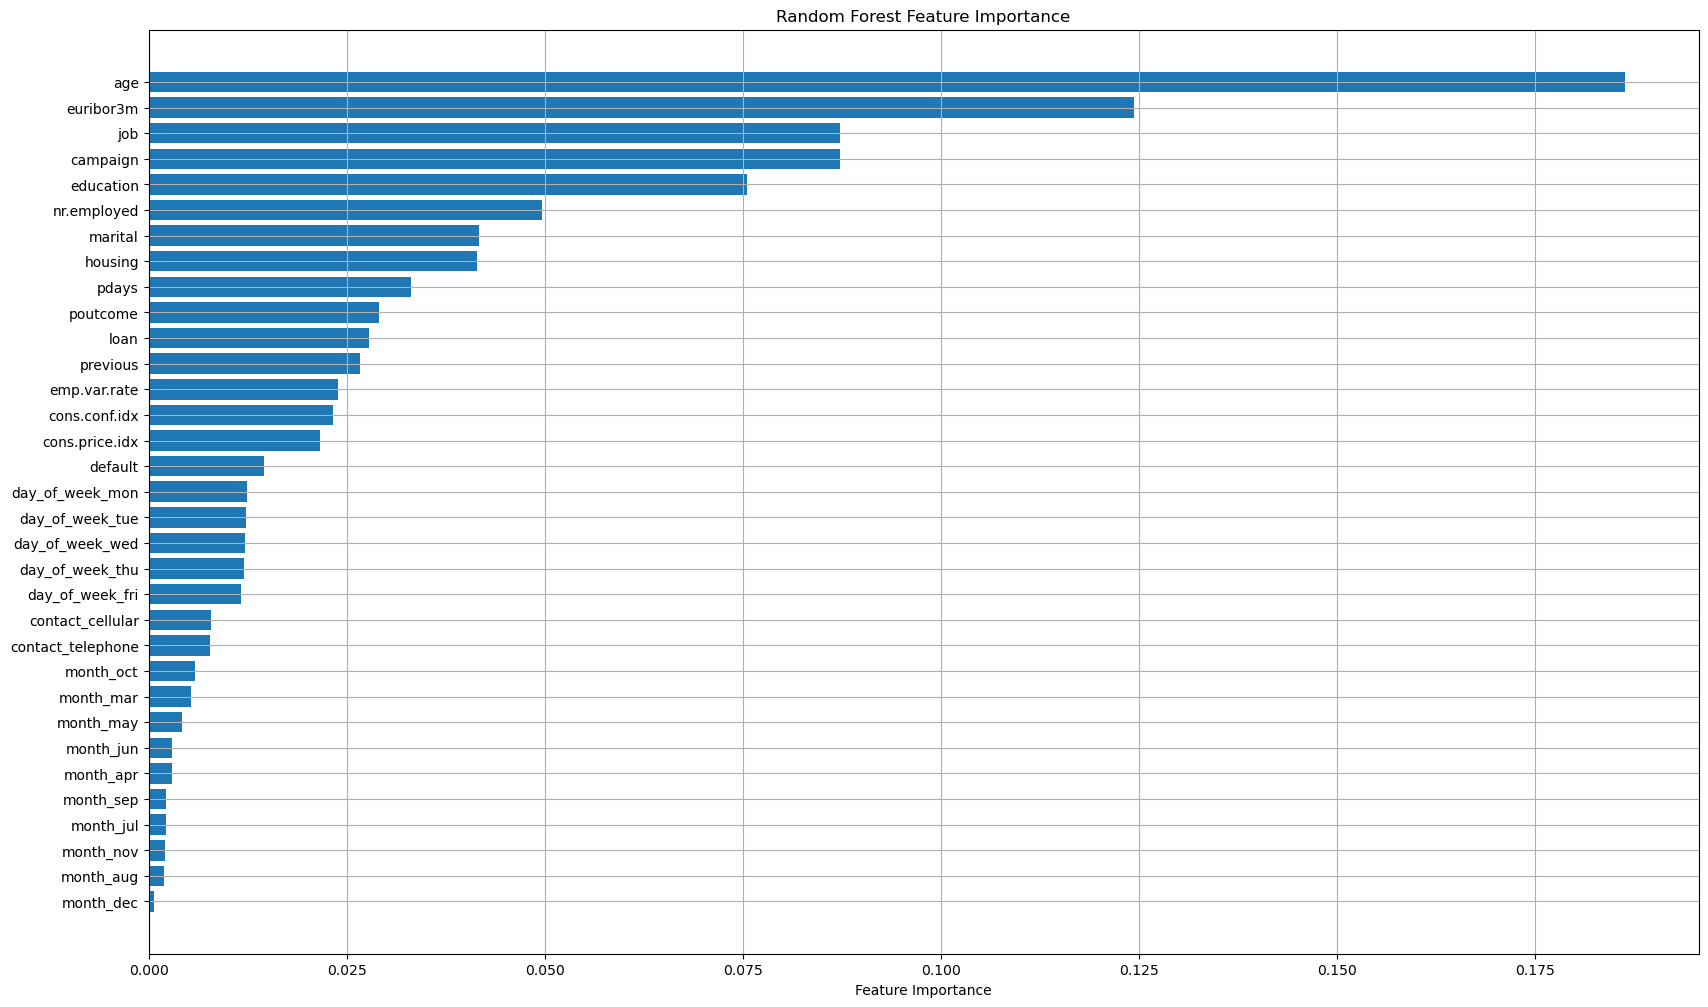

In [42]:
X = df.drop(columns=['y', 'duration'])
y = df['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(20, 12))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid()
plt.show()

### Somente as features com importance > 0.4

Accuracy on the test set: 0.88


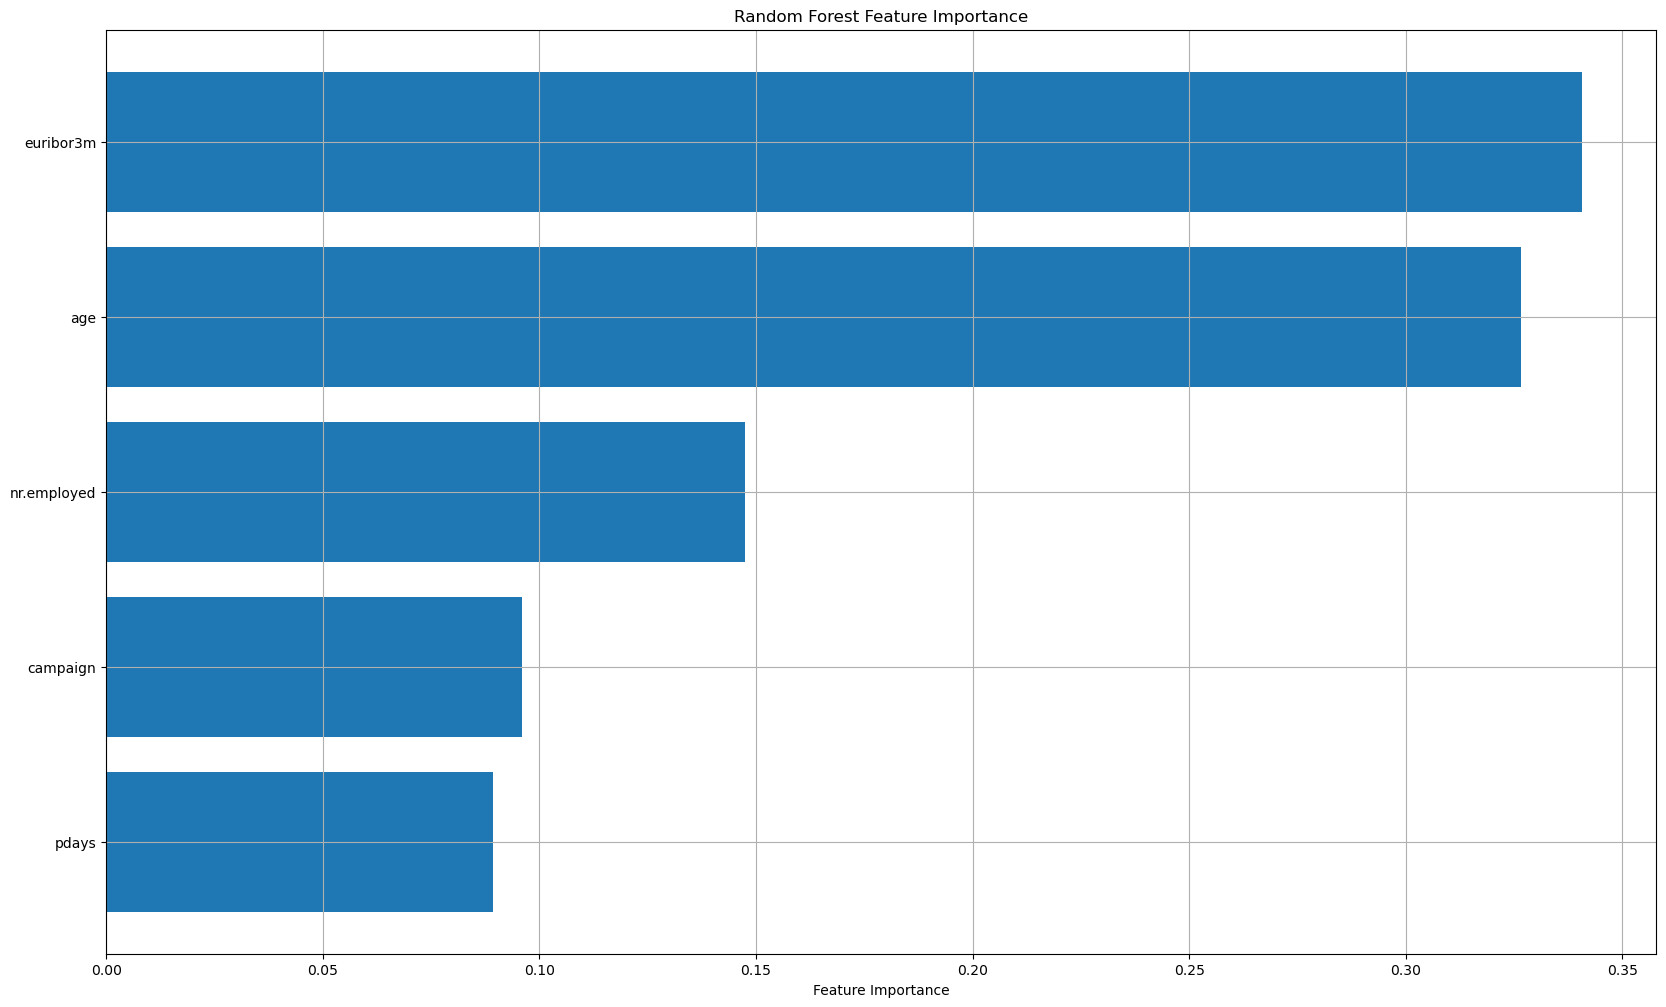

In [43]:
X = df[['age', 'euribor3m', 'campaign', 'nr.employed', 'pdays']]
y = df['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy on the test set: {accuracy:.2f}')

feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(20, 12))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.grid()
plt.show()

In [44]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


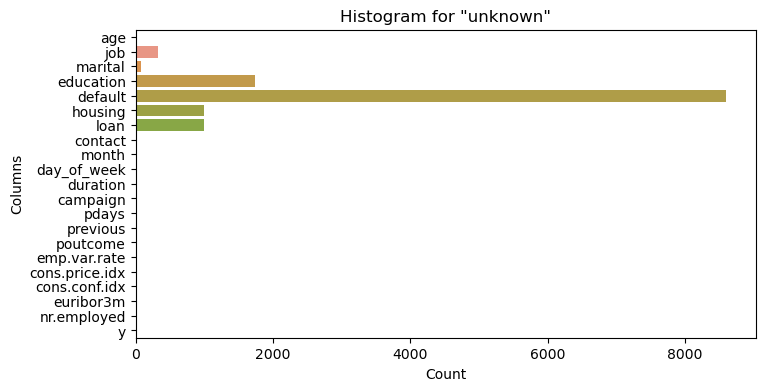

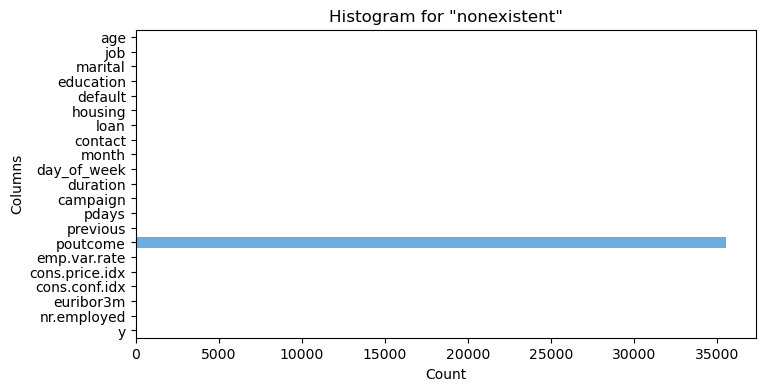

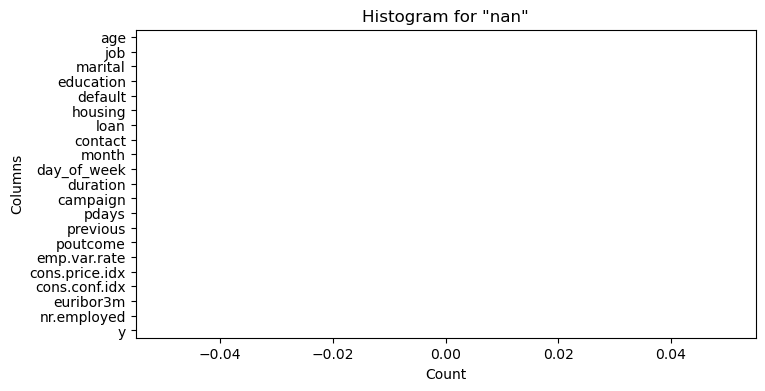

In [45]:
search_values = ['unknown', 'nonexistent', np.nan]

# Create subplots for each search value
for value in search_values:
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram for "{value}"')
    
    # Initialize a count for each column
    counts = []
    
    # Iterate through columns
    for column in df.columns:
        # Count occurrences of the value in the column
        count = df[column].apply(lambda x: x == value).sum()
        counts.append(count)
    
    # Create a bar plot for the counts
    sns.barplot(x=counts, y=df.columns)
    plt.xlabel('Count')
    plt.ylabel('Columns')